In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import cv2
import tensorflow as tf
from tqdm import tqdm
import os
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import Sequential

In [49]:
training = "/content/drive/MyDrive/seg_train"
test = "/content/drive/MyDrive/seg_test"
output=[]

In [50]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}


nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [52]:
import tensorflow as tf
training_dataset = tf.keras.utils.image_dataset_from_directory(
    training,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    interpolation='nearest', # Use nearest neighbor interpolation for resizing
    batch_size=32,
    shuffle=True #
)

Found 2499 files belonging to 5 classes.


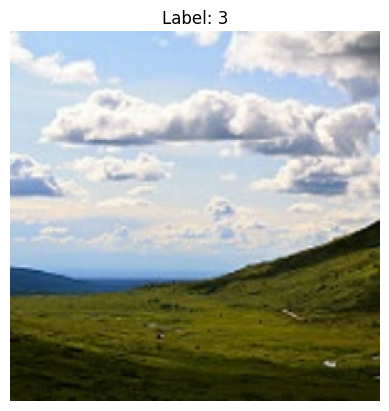

In [51]:
for images, labels in training_dataset.take(1):
    image = images[0]
    label = labels[0]

# Undo normalization (if done previously) by multiplying by 255
image = image * 255

# Plot the image
plt.imshow(image.numpy().astype("uint8"))
plt.title(f"Label: {label.numpy()}")
plt.axis('off')
plt.show()

In [53]:
# Load the train dataset with a validation split (use 80% for training, 20% for validation)
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='training',
    seed=123
)
# Load the validation dataset (20% from the training split)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=123
)
# Load the test dataset
testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    seed=123
)

# Normalize the pixel values to be between 0 and 1
training_dataset = training_dataset.map(lambda x, y: (x / 255, y))
val_dataset = val_dataset.map(lambda x, y: (x / 255, y))
testing_dataset = testing_dataset.map(lambda x, y: (x / 255, y))

# Prefetch data for better performance
training_dataset = training_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)
testing_dataset = testing_dataset.prefetch(tf.data.experimental.AUTOTUNE)


Found 2499 files belonging to 5 classes.
Using 2000 files for training.
Found 2499 files belonging to 5 classes.
Using 499 files for validation.
Found 3000 files belonging to 6 classes.


In [54]:
# Get the total number of training and testing examples indirectly
n_train = tf.data.experimental.cardinality(training_dataset).numpy()
n_test = tf.data.experimental.cardinality(testing_dataset).numpy()

print(f"Number of training examples : {n_train}")
print(f"Number of testing examples : {n_test}")
print(f"Each image is of size : {IMAGE_SIZE}")

Number of training examples : 63
Number of testing examples : 94
Each image is of size : (150, 150)


In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) , activation = 'relu', input_shape=(224,224,3)), # Changed input_shape to (224, 224, 3)
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),
    tf.keras.layers.Dense(6,activation = tf.nn.softmax)
])

In [56]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [57]:
# Get the images and labels from the training_dataset
train_images, train_labels = next(iter(training_dataset))

# Now, you can perform the normalization
train_images = train_images / 255

# Similarly, for test_images, assuming you've loaded your testing data
# into 'testing_dataset', extract the images and labels:
test_images, test_labels = next(iter(testing_dataset))

test_images = test_images / 255

In [58]:
train_images = train_images / 255
test_images = test_images / 255

In [44]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(training_dataset, validation_data=val_dataset, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,789,706 (10.64 MB)

 Trainable params: 2,789,706 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.3486 - loss: 1.5804 - val_accuracy: 0.5591 - val_loss: 1.0208
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.5974 - loss: 0.9562 - val_accuracy: 0.6152 - val_loss: 1.0002
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6866 - loss: 0.8225 - val_accuracy: 0.6774 - val_loss: 0.7793
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.7378 - loss: 0.6486 - val_accuracy: 0.6533 - val_loss: 0.8398
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.8296 - loss: 0.4714 - val_accuracy: 0.7054 - val_loss: 0.8003
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 219s 3s/step - accuracy: 0.8619 - loss: 0.4023 - val_accuracy: 0.6974 - val_loss: 0.9615
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.8942 - loss: 0.3045 - val_accuracy: 0.6774 - val_loss: 0.9838
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.8939 - loss: 0.3095 - val_accuracy: 0.6914 - v

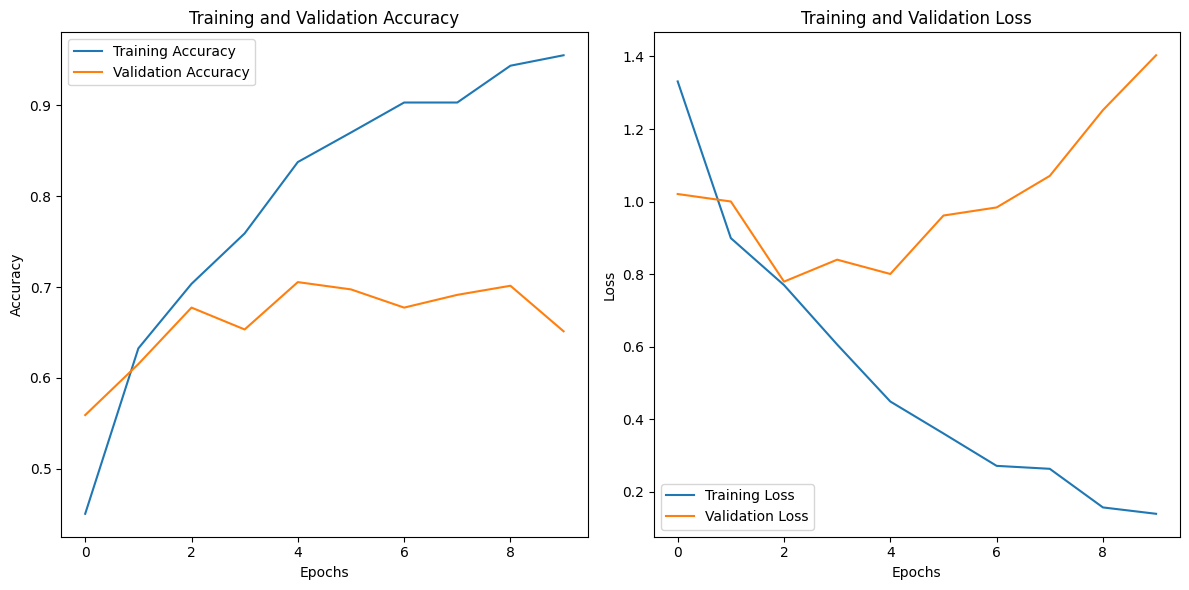

In [59]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [64]:
def plot_accuracy_loss(history):
    fig= plt.figure(figsize=(10,5))
    #Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--' , label = 'accuracy')
    plt.plot(history.history['val_accuracy'] , 'ro--' , label = 'val_accuracy')
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()



  # Plot Loss
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--' , label = 'loss')
    plt.plot(history.history['val_loss'] , 'bo--' , label = 'val_loss')
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()

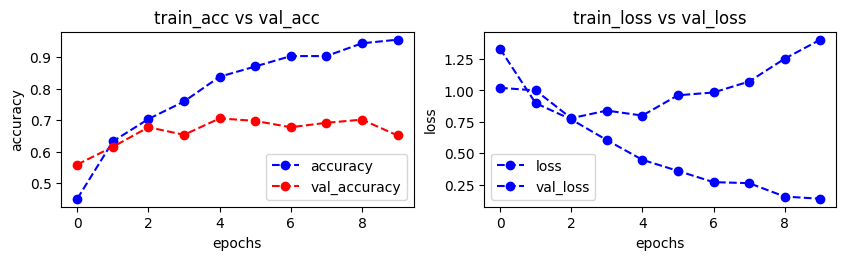

In [65]:
plot_accuracy_loss(history)

In [66]:
test_loss = model.evaluate(test_images,test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.7918


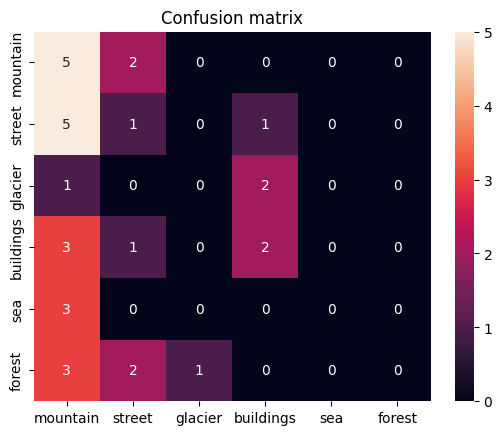

In [68]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()